# Kaggle 신용카드 부정결제 검출 (Google Drive Mount)
https://www.kaggle.com/mlg-ulb/creditcardfraud
## Credit Card Fraud Detection
* creditcard.csv (284,807 * 31)
* Class : '0' (정상결제), '1' (부정결제)
* 부정 검출(Fraud Detection), 이상 탐지(Anomaly Detection)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%time

import pandas as pd

DF = pd.read_csv('./datasets/creditcard.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* '0' (정상) Class와 '1' (부정) Class 개수

In [4]:
DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

* '0' (정상) Class와 '1' (부정) Class 비율

In [5]:
(DF.Class.value_counts() / DF.shape[0]) * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

> ## 3) Time 열(Column) 삭제

In [6]:
DF.drop('Time', axis = 1, inplace = True)

DF.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


> ## 4) train_test_split

* X (Input), y (Output) 지정

In [7]:
X = DF.iloc[:,:-1]
y = DF.iloc[:, -1]

X.shape, y.shape

((284807, 29), (284807,))

> ### (1) Without 'stratify'

In [8]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

* Train_Data와 Test_Data의 1 (부정) 비율이 불균형

In [9]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    99.825445
1     0.174555
Name: Class, dtype: float64
Test_Data : 
 0    99.831467
1     0.168533
Name: Class, dtype: float64


> ### (2) With 'Stratify'

In [10]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

* Train_Data와 Test_Data의 1 (부정) 비율이 균형

In [11]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    99.827451
1     0.172549
Name: Class, dtype: float64
Test_Data : 
 0    99.826785
1     0.173215
Name: Class, dtype: float64


# III. Modeling

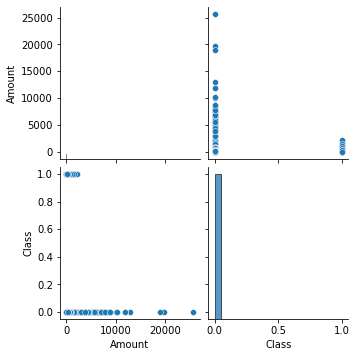

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data=DF[['Amount','Class']])
plt.show()

<AxesSubplot:>

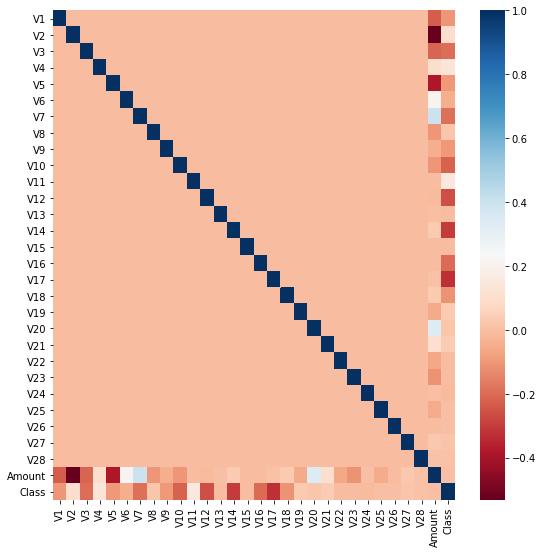

In [14]:
plt.figure(figsize=(9,9))
corr=DF.corr()
sns.heatmap(corr, cmap='RdBu')

# RandomForestClassifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

Model_rf=RandomForestClassifier(random_state=2045)
Model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2045,
                       verbose=0, warm_start=False)

In [41]:
y_hat=Model_rf.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat,labels=[1,0])

array([[  126,    22],
       [   12, 85283]])

In [26]:
from sklearn.metrics import recall_score, accuracy_score

print(accuracy_score(y_test, y_hat))
print(recall_score(y_test,y_hat, average=None))

0.999602073897218
[0.99985931 0.85135135]


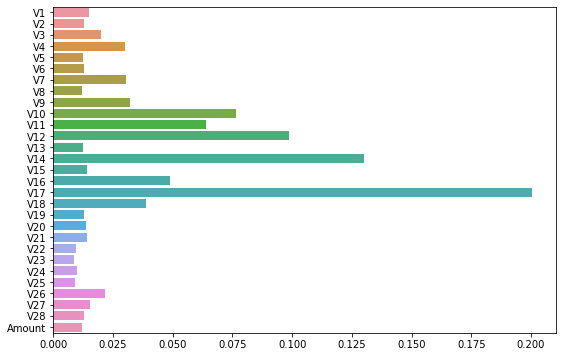

In [35]:
plt.figure(figsize=(9,6))
sns.barplot(Model_rf.feature_importances_,['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
plt.show()

In [51]:
DF2=DF[['V4','V7','V9','V10','V11','V12','V14','V16','V17','V18','Class']]

In [52]:
X2 = DF2.iloc[:,:-1]
y2 = DF2.iloc[:, -1]

X2.shape, y2.shape

((284807, 10), (284807,))

In [53]:
from sklearn.model_selection import train_test_split 

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2,
                                                    test_size = 0.3,
                                                    stratify = y2,
                                                    random_state = 2045)

X2_train.shape, y2_train.shape, X2_test.shape, y2_test.shape

((199364, 10), (199364,), (85443, 10), (85443,))

In [67]:
from sklearn.ensemble import RandomForestClassifier

Model_rf=RandomForestClassifier(n_estimators=300,
                                random_state=2045)
Model_rf.fit(X2_train, y2_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=2045,
                       verbose=0, warm_start=False)

In [68]:
y2_hat=Model_rf.predict(X2_test)

In [69]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y2_test, y2_hat,labels=[1,0])

array([[  126,    22],
       [   11, 85284]])

In [75]:
from sklearn.metrics import recall_score, accuracy_score, precision_score

print(accuracy_score(y2_test, y2_hat))
print(precision_score(y2_test, y2_hat, average=None))
print(recall_score(y2_test,y2_hat, average=None))

0.9996137776061234
[0.9997421  0.91970803]
[0.99987104 0.85135135]


# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

Model_dt=DecisionTreeClassifier(random_state=2045)
Model_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2045, splitter='best')

In [43]:
y_hat=Model_dt.predict(X_test)
y_hat

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat,labels=[1,0])

array([[  120,    28],
       [   32, 85263]])

In [30]:
from sklearn.metrics import recall_score, accuracy_score

print(accuracy_score(y_test, y_hat))
print(recall_score(y_test,y_hat, average=None))

0.9992977774656788
[0.99962483 0.81081081]


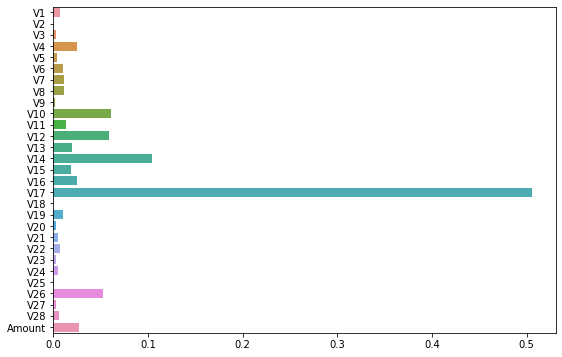

In [34]:
plt.figure(figsize=(9,6))
sns.barplot(Model_dt.feature_importances_,['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
plt.show()

In [33]:
DF.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

# LogisticRegression

In [36]:
from sklearn.linear_model import LogisticRegression

Model_lr = LogisticRegression()
Model_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
y_hat=Model_lr.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat,labels=[1,0])

array([[  111,    37],
       [   16, 85279]])

In [47]:
from sklearn.metrics import recall_score, accuracy_score

print(accuracy_score(y_test, y_hat))
print(recall_score(y_test,y_hat, average=None))

0.9993797034280163
[0.99981242 0.75      ]


#The End#